<a href="https://colab.research.google.com/github/MRobalinho/Most_Common_Words_2018/blob/master/Most_Common_words_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Most Common Words 2018

In the world
https://www.irishtimes.com/culture/books/collins-dictionary-2018-word-of-the-year-revealed-1.3688069

In Portugal
https://ncultura.pt/as-palavras-mais-populares-em-2018-pesquisadas-no-google-em-portugal/

By Manuel Robalinho 12-01-2019




In [10]:
# Readind (upload) Files
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving stopwords_en.txt to stopwords_en.txt
Saving stopwords_pt.txt to stopwords_pt.txt
Saving words2018.txt to words2018 (1).txt
User uploaded file "stopwords_en.txt" with length 512 bytes
User uploaded file "stopwords_pt.txt" with length 686 bytes
User uploaded file "words2018.txt" with length 460 bytes


In [0]:
# Libraries
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Path to acess the file
path = 'ml/count_words/'

In [0]:
# Read input file, note the encoding is specified here 
# It may be different in your text file
my_text = 'words2018.txt'

file = open( my_text, encoding="utf8")
text_file = file.read()

In [7]:
text_file

'Single-use Single-use Single-use Single-use Single-use Single-use Single-use Single-use Single-use Single-use \nBackstop Backstop Backstop Backstop Backstop Backstop Backstop Backstop Backstop \nFloss Floss Floss Floss Floss Floss Floss Floss\nGammon Gammon Gammon Gammon Gammon Gammon Gammon\nGaslight  Gaslight Gaslight Gaslight Gaslight Gaslight \nMeToo MeToo MeToo MeToo MeToo \nPlogging Plogging Plogging Plogging \nVAR VAR VAR \nVegan Vegan \nWhitewash\n'

In [0]:
from pprint import pprint

In [9]:
# print my text file to analyze
pprint(text_file, width=100)

('Single-use Single-use Single-use Single-use Single-use Single-use Single-use Single-use '
 'Single-use Single-use \n'
 'Backstop Backstop Backstop Backstop Backstop Backstop Backstop Backstop Backstop \n'
 'Floss Floss Floss Floss Floss Floss Floss Floss\n'
 'Gammon Gammon Gammon Gammon Gammon Gammon Gammon\n'
 'Gaslight  Gaslight Gaslight Gaslight Gaslight Gaslight \n'
 'MeToo MeToo MeToo MeToo MeToo \n'
 'Plogging Plogging Plogging Plogging \n'
 'VAR VAR VAR \n'
 'Vegan Vegan \n'
 'Whitewash\n')


In [0]:
# Stopwords - File with words we don't need count
# read one word each line of stopwords 
stopwords = set(line.strip() for line in open('stopwords_en.txt'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

In [13]:
# Print the words i dont't want to count
print (stopwords)

{'', 'it', 'within', 'be', '^^', 'on', 'of', 'all', 'off', 'over', 'mrs', 'how', 'help', 'by', 'their', 'out', 'a-z', 'index', 'ann', '03', 'true', '1', 'is', 'may', 'next', 'back', 'more', 'last', 'to', 'not', 'what', 'while', '08', 'too', '10', 'news', 'he', 'will', 'at', '01', '04', 'see', '3', 'a', 'them', '0', 'this', 'do', 'am', 'and', 'as', 'other', 'notes', 'new', 'can', 'i', 'with', 'for', 'only', '09', 'mar', 'show', '7', 'page', 'top', 'are', 'than', 'but', 'these', 'the', 'two', 'say', 'mr', 'text', "don't", 'they', 'or', 'said', 'gmt', "won't", '5', '8', '07', '9', 'your', 'was', '4', 'an', '05', 'if', 'in', 'you', 'one', '6', '06', 'thing', '02', 'there', '2', 'who', 'that'}


## Count Text Words

In [0]:

# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}

In [0]:
# To eliminate duplicates, we need remember to split by punctuation, and use case demiliters.
for word in text_file.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

In [16]:
pprint(wordcount)

{'backstop': 9,
 'floss': 8,
 'gammon': 7,
 'gaslight': 6,
 'metoo': 5,
 'plogging': 4,
 'single-use': 10,
 'var': 3,
 'vegan': 2,
 'whitewash': 1}


In [18]:
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

How many most common words to print: 12

OK. The 12 most common words are as follows

single-use :  10
backstop :  9
floss :  8
gammon :  7
gaslight :  6
metoo :  5
plogging :  4
var :  3
vegan :  2
whitewash :  1


In [0]:
# Close the file
file.close()

## Using Bar Graph

In [0]:
my_title = "Most common words in the year 2018" 

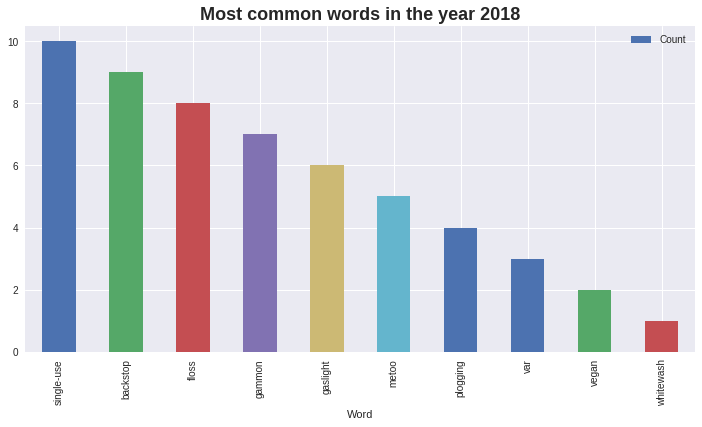

In [31]:
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])

fig, ax1 = plt.subplots(figsize=(12,6))
ax1 = df.plot.bar(ax=ax1, x='Word',y='Count')
plt.title(my_title , fontdict={'size':18, 'weight': 'bold'});

In [32]:
df.head(10)

,Word,Count
0,single-use,10
1,backstop,9
2,floss,8
3,gammon,7
4,gaslight,6
5,metoo,5
6,plogging,4
7,var,3
8,vegan,2
9,whitewash,1


## Using Word Cloud Graph

In [0]:
# To install the wordcloud use the bellow commands
# conda install -c conda-forge wordcloud
# https://www.datacamp.com/community/tutorials/wordcloud-python
# https://www.commonlounge.com/discussion/317a12109a634fc1aa44150ea806bbf3
# https://matplotlib.org/examples/color/colormaps_reference.html - Colormap to matplotlib

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import cm
import numpy as np

In [34]:
wrds = df.Word

# WORDS without spaces
wrds =  df["Word"].str.replace(" ","")
wrds.head()

0    single-use
1      backstop
2         floss
3        gammon
4      gaslight
Name: Word, dtype: object

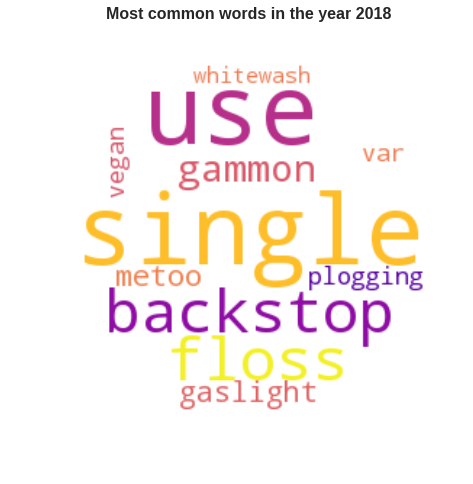

In [35]:
# Plot The WORDS in a Circle

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white",  mask=mask, colormap=cm.plasma).generate(" ".join(wrds))

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation="bilinear", origin='upper')
plt.axis("off")
#plt.tight_layout(pad=0)
plt.title(my_title , fontdict={'size':16, 'weight': 'bold'});

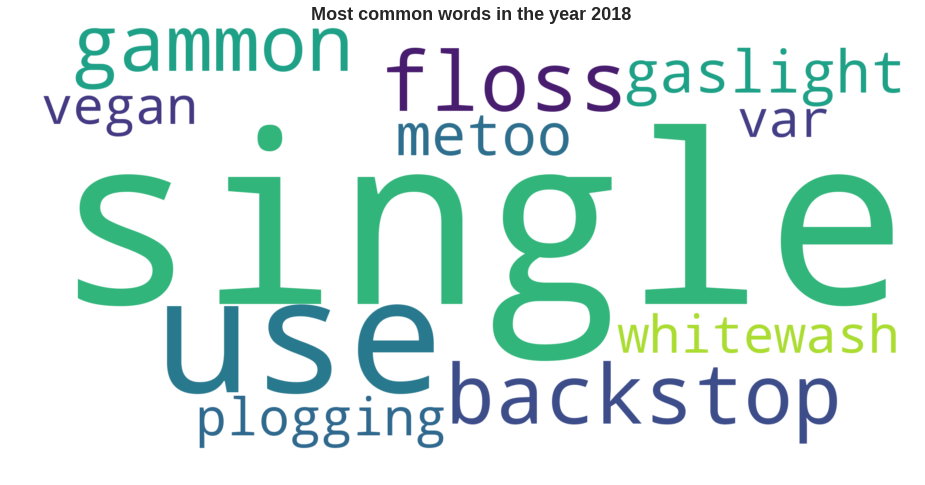

In [36]:
# Plot The WORDS in a Frame

wc = WordCloud( background_color='white', colormap=cm.viridis, scale=5).generate(" ".join(wrds))

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation="bilinear", origin='upper')
plt.axis("off")
plt.title(my_title , fontdict={'size':18, 'weight': 'bold'});